In [1]:
%%javascript
var selector = '.CodeMirror-sizer:contains("%%R")';
jQuery(selector).css("background", "#eafaf1");

<IPython.core.display.Javascript object>

In [32]:
%load_ext rpy2.ipython

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [99]:
%%R
library(dplyr)
library(ggplot2)
library(broom)

additional reference: https://www.datarobot.com/blog/multiple-regression-using-statsmodels/

In [13]:
tips = pd.read_csv('../data/tips.csv')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [14]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [18]:
%%R

tips <- tbl_df(read.csv('../data/tips.csv', na.strings=c("NA","NaN", ""), stringsAsFactors = FALSE))

tips %>% head(5) %>% print
tips %>% str

# A tibble: 5 x 7
  total_bill   tip    sex smoker   day   time  size
       <dbl> <dbl>  <chr>  <chr> <chr>  <chr> <int>
1      16.99  1.01 Female     No   Sun Dinner     2
2      10.34  1.66   Male     No   Sun Dinner     3
3      21.01  3.50   Male     No   Sun Dinner     3
4      23.68  3.31   Male     No   Sun Dinner     2
5      24.59  3.61 Female     No   Sun Dinner     4
Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	244 obs. of  7 variables:
 $ total_bill: num  17 10.3 21 23.7 24.6 ...
 $ tip       : num  1.01 1.66 3.5 3.31 3.61 4.71 2 3.12 1.96 3.23 ...
 $ sex       : chr  "Female" "Male" "Male" "Male" ...
 $ smoker    : chr  "No" "No" "No" "No" ...
 $ day       : chr  "Sun" "Sun" "Sun" "Sun" ...
 $ time      : chr  "Dinner" "Dinner" "Dinner" "Dinner" ...
 $ size      : int  2 3 3 2 4 4 2 4 2 2 ...


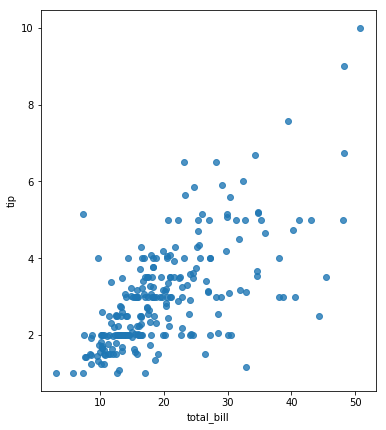

In [62]:
sns.regplot(
        x="total_bill", y="tip", 
        data=tips, fit_reg=False
).figure.set_figheight(7)


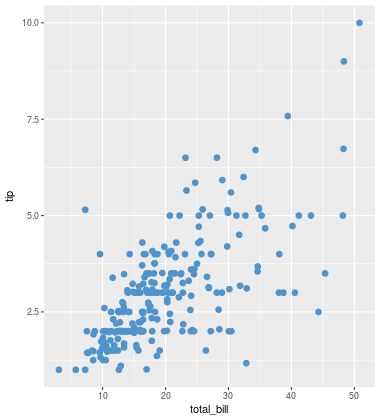

In [76]:
%%R -w 380 -h 420

tips %>%
    ggplot() +
    geom_point(aes(x=total_bill, y=tip),
               size=2.5, color='steelblue3')

In [94]:
X = tips[['total_bill']].copy()
X['intercept'] = 1

model = sm.OLS(
    endog=tips['tip'], 
    exog=X
)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                 Вт, 06 фев 2018   Prob (F-statistic):           6.69e-34
Time:                        03:24:34   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
intercept      0.9203      0.160      5.761      0.000       0.606       1.235
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# no need to add intercept manually


model = smf.ols(
    formula='tip ~ total_bill',
    data=tips
)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                 Вт, 06 фев 2018   Prob (F-statistic):           6.69e-34
Time:                        03:36:24   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
%%R

model <- lm(tip ~ total_bill, data=tips)
model %>% glance %>% print
model %>% tidy

  r.squared adj.r.squared    sigma statistic      p.value df    logLik      AIC
1 0.4566166     0.4543712 1.022048  203.3577 6.692471e-34  2 -350.5381 707.0762
       BIC deviance df.residual
1 717.5677 252.7887         242
         term  estimate  std.error statistic      p.value
1 (Intercept) 0.9202696 0.15973475  5.761236 2.526443e-08
2  total_bill 0.1050245 0.00736479 14.260355 6.692471e-34


In [97]:
model = smf.ols(formula='tip ~ total_bill + sex',
                data=tips)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     101.3
Date:                 Вт, 06 фев 2018   Prob (F-statistic):           1.18e-32
Time:                        04:18:07   Log-Likelihood:                -350.52
No. Observations:                 244   AIC:                             707.0
Df Residuals:                     241   BIC:                             717.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9333      0.174      5.371      0.000       0.591       1.276
sex[T.Male]    -0.0266      0.138     -0.192      0.848      -0.299       0.246
total_bill      0.1052      0.007     14.110      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.499   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.652
Skew:                           0.447   Prob(JB):                     4.05e-09
Kurtosis:                       4.733   Cond. No.                         62.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
%%R

model <- lm(tip ~ total_bill + sex, data=tips)
model %>% glance %>% print
model %>% tidy

  r.squared adj.r.squared    sigma statistic      p.value df    logLik      AIC
1    0.4567     0.4521913 1.024087  101.2927 1.181095e-32  3 -350.5194 709.0387
       BIC deviance df.residual
1 723.0274 252.7499         241
         term    estimate   std.error  statistic      p.value
1 (Intercept)  0.93327849 0.173755748  5.3712093 1.840609e-07
2  total_bill  0.10523236 0.007458174 14.1096681 2.332173e-33
3     sexMale -0.02660871 0.138333952 -0.1923513 8.476290e-01
